## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# ▶**Exploring Play store data:**

In [1]:
#we import important library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

from datetime import datetime


# Explore play store **DataFrame**

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading csv File
path = "/content/drive/MyDrive/Colab Notebooks/caption project 1/Play Store App Review Analysis/Copy of Play Store Data.csv"
data = pd.read_csv(path)

In [ ]:
# Display the first 5 Play Store App data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Display the last 5 Play Store App data
data.tail()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Finding the number of rows and columns in the given dataset
print(data.columns)
print(data.shape)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
(10841, 13)


In [ ]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Let us first define what information the columns contain based on our inspection.**

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application .
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the  app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - It states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. 
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

# **Cleaning of the data**

In [ ]:
#count of null and non null values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

# Findings

`The number of null values are:`

Rating has 1474 null values  of the data.
Type has 1 null value which  of the data.
Content_Rating has 1 null value  of the data.
Current_Ver has 8 null values  of the data.
Android_Ver has 3 null values  of the data.

## **1). Android Ver: There are a total of 3 NaN values in this column.**

its null 3 values but after cleaning we run then clean the all null values 

In [ ]:
data[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.
data=data[data['Android Ver'].notna()]

In [ ]:

data.shape

(10838, 13)

We were successfully able to handle the NaN values in the` Android Ver `column.****

# **2**). Current Ver: There are a total of 8 NaN values in this column.

In [ ]:
data[data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
data.shape

(10838, 13)

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Current Ver' column.
data=data[data['Current Ver'].notna()]
data.shape

(10830, 13)

We were successfully able to handle the NaN values in the` Android Ver `column.**bold text**

# 3). Type: There is only one NaN value in this column.**bold text**

In [ ]:
data[data["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:

data["Type"].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Paid'
data.loc[9148,"Type"] = "Paid"

In [ ]:
data[data["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4). Rating: This column contains 1470 NaN values.**bold text**

In [ ]:
data[data["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


* The `Rating` column contains 1470 NaN values of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of **data**
*we can replace all the null values in the (mean or median) 

In [ ]:
mean_rating = data['Rating'].mean()
median_rating = data['Rating'].median()
print(mean_rating)
print(median_rating)

4.191837606837606
4.3


In [ ]:
print(mean_rating)

4.191837606837606


In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
# The fillna() method replaces the NULL values with a specified value. 
data['Rating'].fillna(value=median_rating,inplace=True)

In [ ]:
data[data["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
data.shape

(10830, 13)

We were successfully able to handle the NaN values in the` Rating `rows.

one more check to any null values is here or not

In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

almost all handle the null values

# **Data Visualization on play store data:**
We have sucessfully cleaned the dirty data. Now we can perform some data visualization .

## **`**1**). What is the ratio of number of Paid apps and Free apps?`**

In [ ]:
data["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

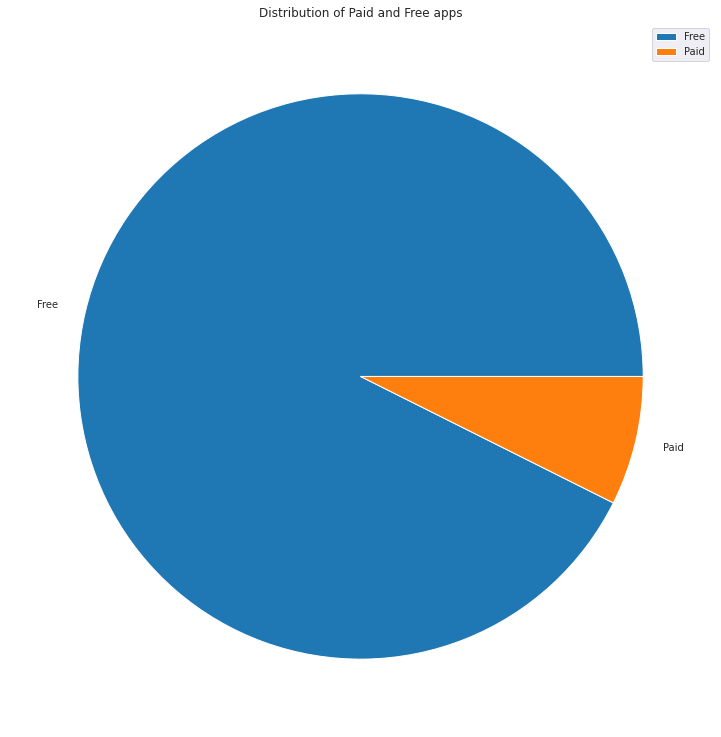

In [ ]:
type = ['Free' , 'Paid']
 
value = [10039 , 800]
 
# Creating plot
fig = plt.figure(figsize =(20, 13))
plt.pie(value, labels = type)
plt.title('Distribution of Paid and Free apps')

# show plot
plt.legend()
plt.show()

## **`2).  Which category of Apps from the Content Rating column are found more on playstore ?`**

In [ ]:
df = data['Content Rating'].unique()

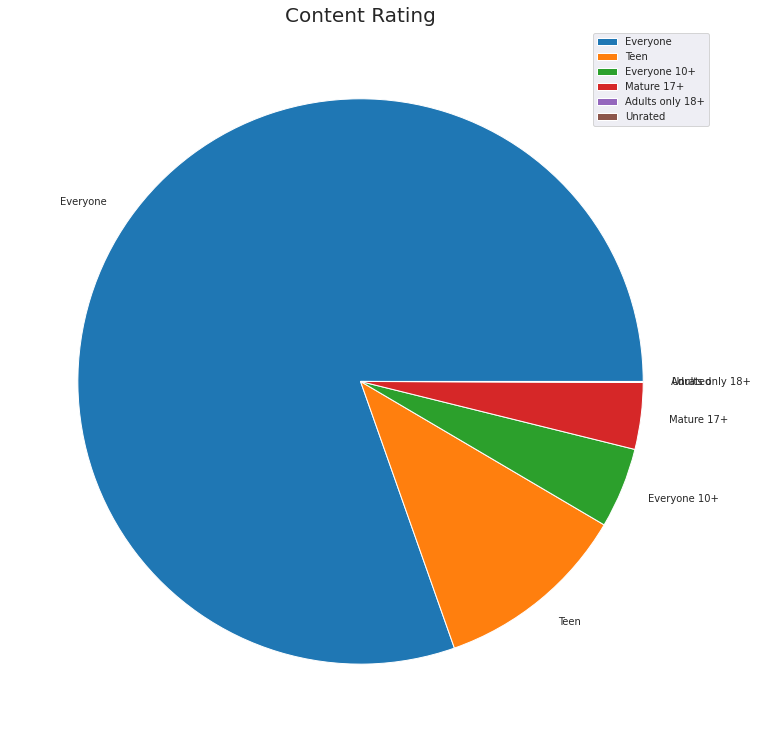

In [ ]:
df = data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(20,13))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
#plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.pie(df, labels = labels)
plt.title('Content Rating',size=20,loc='center')
plt.legend()

## **`3).Top categories on Google Playstore?`**

In [ ]:
data.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: App, dtype: int64

In [ ]:
x = data['Category'].value_counts()
y = data['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

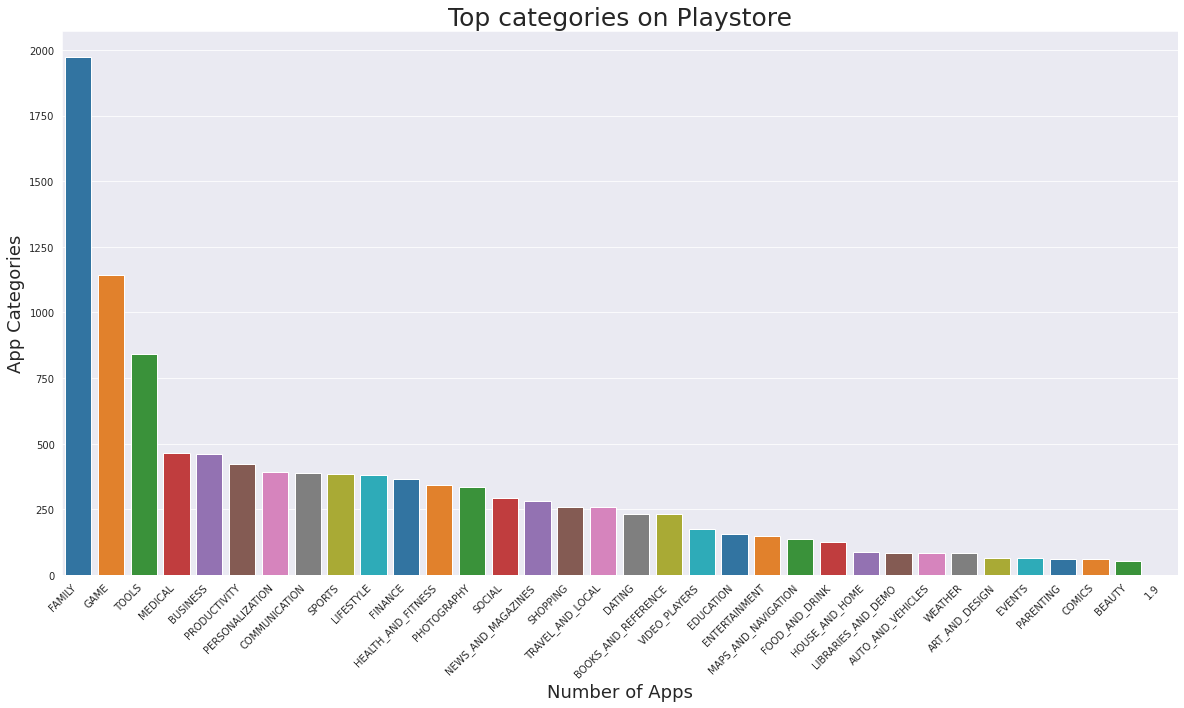

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=18)
plt.ylabel('App Categories', size=18)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

# 4 .) # Percentage of apps belonging to each category in the playstore

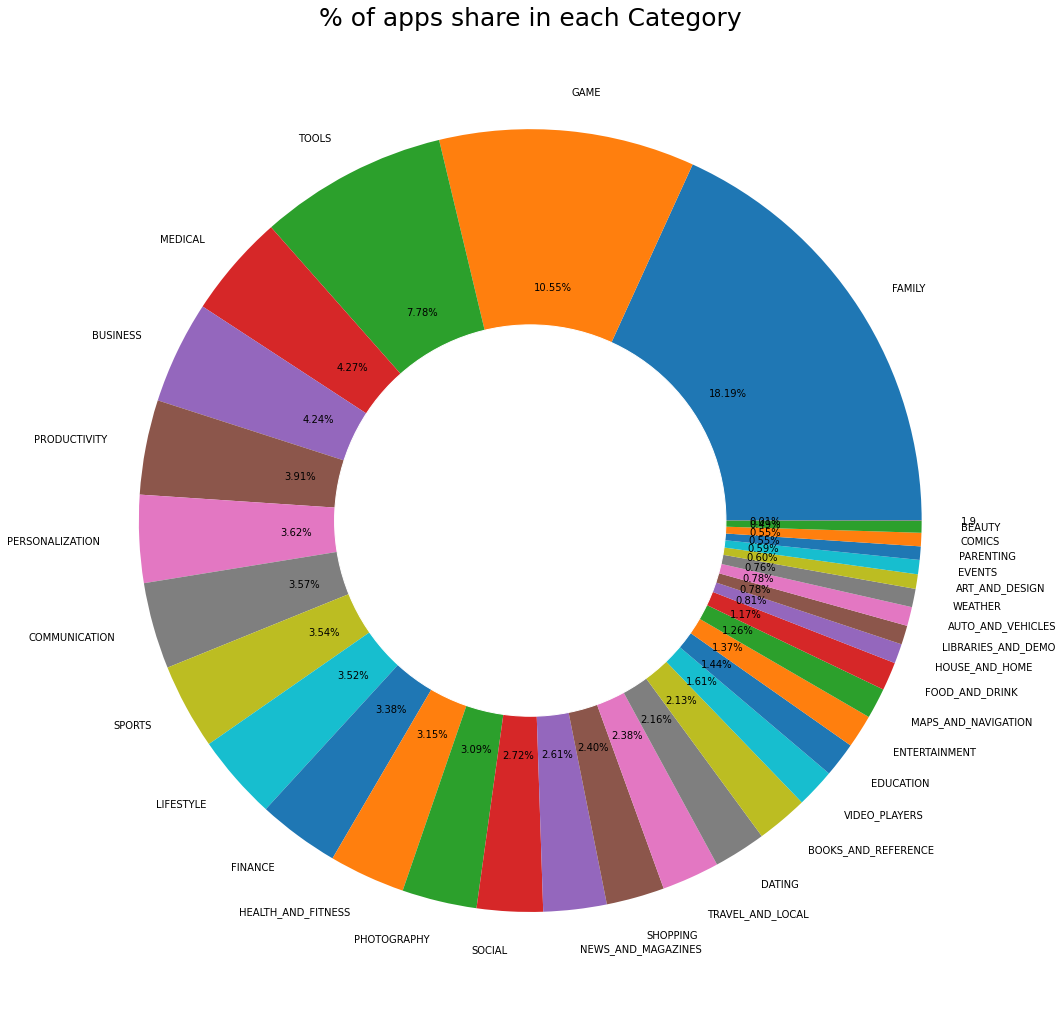

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(data.Category.value_counts(), labels=data.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()


# 5). Which category App's have most number of installs?`

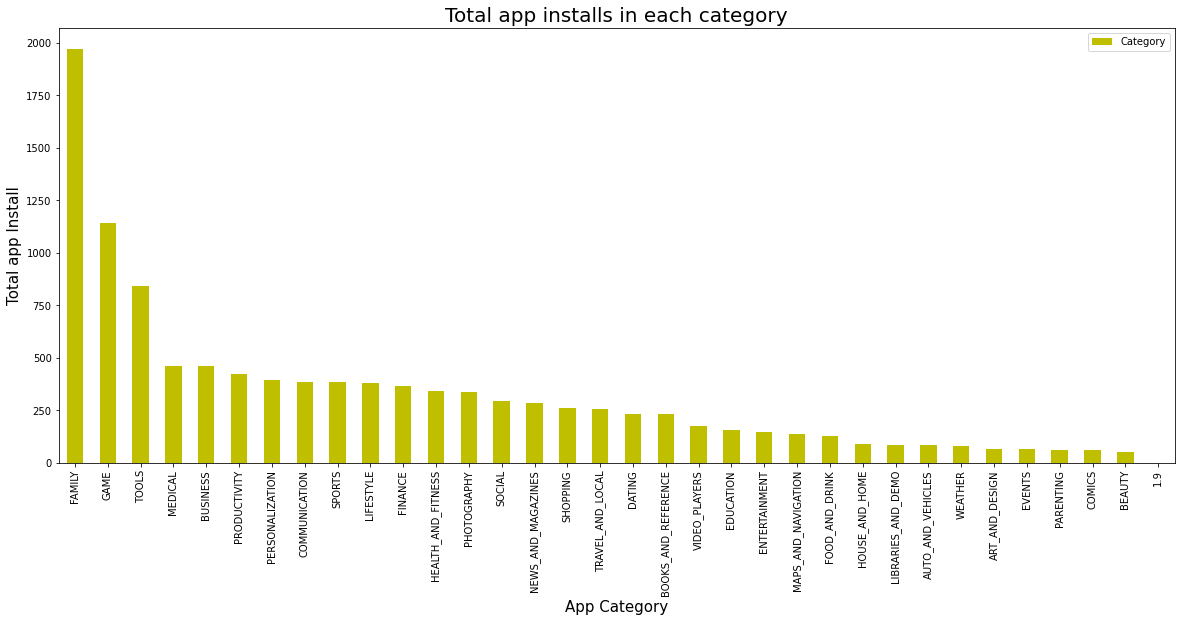

In [ ]:

# Average app ratings
data['Category'].value_counts().plot.bar(figsize=(20,8), color = 'y' )

plt.ylabel('Total app Install',fontsize = 15 )
plt.xlabel('App Category', fontsize = 15)
plt.title('Total app installs in each category', fontsize = 20)
plt.legend()


The FAMILY and GAMES and Tools categories has the highest number of installs compared to other categories of apps.

# 6-**bold text**) # Average app ratings

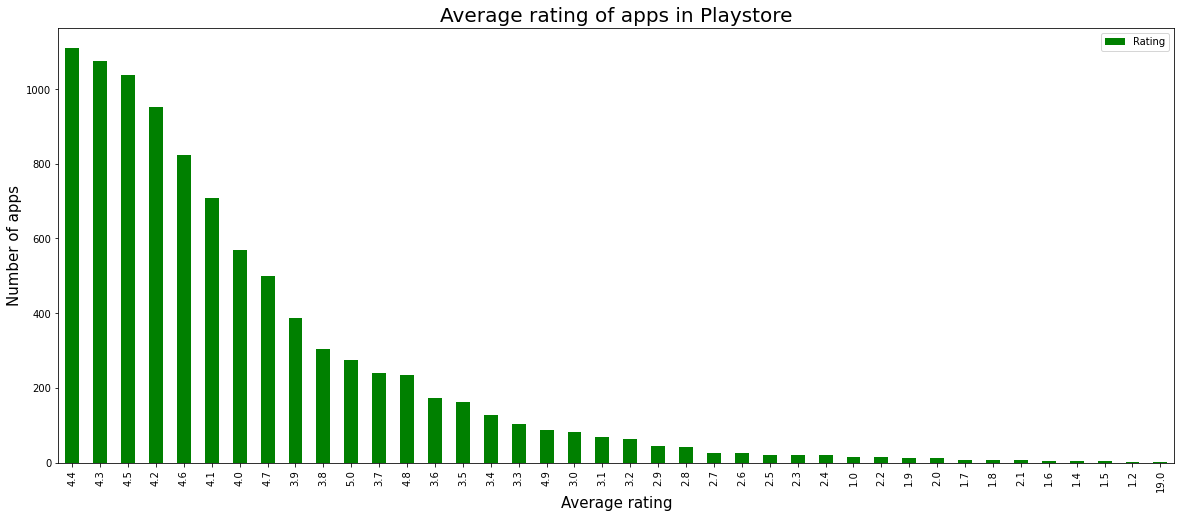

In [ ]:
# Average app ratings
data['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'g' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

# **Exploring User_review dataframe**

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/caption project 1/Play Store App Review Analysis/Copy of User Reviews.csv'
ur=pd.read_csv(file_path)

In [ ]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


## **Handling the  NaN values in the User reviews**

In [ ]:
ur.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [ ]:
ur.shape

(64295, 5)

In [ ]:
# Deleting the rows containing NaN values
ur = ur.dropna()

In [ ]:
ur.shape

(37427, 5)

In [ ]:
# show the sentiment column
ur['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

# **Data Visualization on User Reviews:**
### **`1). Percentage of Review Sentiments`**

In [ ]:
ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

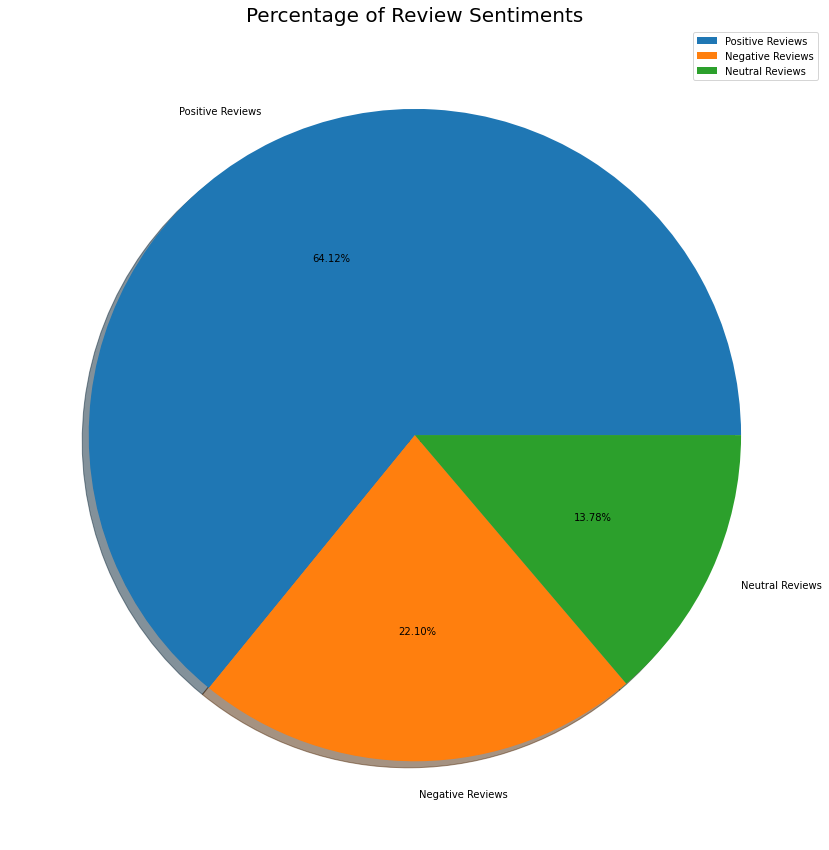

In [ ]:
da = ur['Sentiment'].value_counts()
labels = ['Positive Reviews', 'Negative Reviews','Neutral Reviews']

#create pie chart
plt.figure(figsize=(15,15))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c']
#plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.pie(da, labels = labels , shadow=True , autopct="%.2f%%")
plt.title('Percentage of Review Sentiments',size=20,loc='center')
plt.legend()

#                                                     Thanks.........****